## Dogrusal Olmayan Regresyon Modelleri

### 1. K- En Yakin Komsu(KNN)
- Tahminler gozlem benzerligine gore yapilir
- Bana arkadasini soyle sana kim oldugunu soyleyeyim

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

# hata mesaji almamak icin 
from warnings import filterwarnings
filterwarnings('ignore')

### KNN

In [5]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [6]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [7]:
knn_model

KNeighborsRegressor()

In [8]:
# kommsuluk sayisi
knn_model.n_neighbors

5

#### KNN Tahmin

In [10]:
 y_pred = knn_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [12]:
# dogrulanmamis hata hesaplamak.
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "icin RMSE degeri:", rmse)

k =  1 icin RMSE degeri: 0.0
k =  2 icin RMSE degeri: 179.52761335480352
k =  3 icin RMSE degeri: 205.20157172291863
k =  4 icin RMSE degeri: 220.5139794876305
k =  5 icin RMSE degeri: 239.6467132541376
k =  6 icin RMSE degeri: 243.5904190007242
k =  7 icin RMSE degeri: 258.1478781634636
k =  8 icin RMSE degeri: 266.05374203349805
k =  9 icin RMSE degeri: 269.73782093553376
k =  10 icin RMSE degeri: 271.2798300436963


#### KNN Model Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

##### GridSearchCV
 - GridSearchCV, sklearn kütüphanesinin bir parçası olan ve makine öğrenmesi modellerinin hiperparametrelerini optimize etmek için kullanılan bir araçtır.
 - Model ve Hiperparametreleri Belirleme: Hangi modelin ve hangi hiperparametrelerin deneneceğini belirleyin.
- GridSearchCV Nesnesi Oluşturma: GridSearchCV nesnesi, model ve hiperparametreler ile oluşturulur.
- Modeli Eğitme: fit metodu ile eğitim verisi üzerinde modeli eğitir ve en iyi hiperparametreleri bulur.
- Sonuçları İnceleme: En iyi model ve performans metriklerini inceleyebilirsiniz. 

In [16]:
knn_params = {'n_neighbors': np.arange(1, 30, 1)}
np.arange(1, 30, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [17]:
knn = KNeighborsRegressor()

In [18]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [19]:
# burda modeli egitik ve aslinda burda parametreleri deneyip ve uygun olan 
# parametreyi bulmus oldu
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [20]:
knn_cv_model.best_params_["n_neighbors"]

8

In [21]:
# cross validation edilmis hata hesaplamak..
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, 
                                     X_train,
                                     y_train,
                                     cv = 10,
                                     scoring = "neg_mean_squared_error")).mean()

    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k = ", k, "icin RMSE degeri: ", rmse, "RMSE_CV degeri: ", rmse_cv)

k =  1 icin RMSE degeri:  0.0 RMSE_CV degeri:  314.00484847632146
k =  2 icin RMSE degeri:  179.52761335480352 RMSE_CV degeri:  286.3603325067769
k =  3 icin RMSE degeri:  205.20157172291863 RMSE_CV degeri:  273.9931666607254
k =  4 icin RMSE degeri:  220.5139794876305 RMSE_CV degeri:  275.7180399577597
k =  5 icin RMSE degeri:  239.6467132541376 RMSE_CV degeri:  278.63565154224034
k =  6 icin RMSE degeri:  243.5904190007242 RMSE_CV degeri:  284.4231965885963
k =  7 icin RMSE degeri:  258.1478781634636 RMSE_CV degeri:  280.0247076065351
k =  8 icin RMSE degeri:  266.05374203349805 RMSE_CV degeri:  276.2836061510732
k =  9 icin RMSE degeri:  269.73782093553376 RMSE_CV degeri:  280.327057055243
k =  10 icin RMSE degeri:  271.2798300436963 RMSE_CV degeri:  287.23959512744636


In [22]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [23]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [24]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

### Destek Vektor Regresyonu(SVR)
- amac, bir marjin araliginda maximum noktayi en kucuk hata ile alabilecek sekilde dogruyu  ya da egriyi belirlemektir.

In [26]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [27]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])


In [28]:
from sklearn.svm import SVR

In [29]:
svr_model = SVR(kernel = "linear").fit(X_train, y_train)

In [30]:
y_pred = svr_model.predict(X_test)[0:5]

In [31]:
# svr'in model denklemi
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [32]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [33]:
-48.6975609756151 + 4.969512195122093 * 91

403.52804878049534

In [34]:
y_pred = svr_model.predict(X_test)

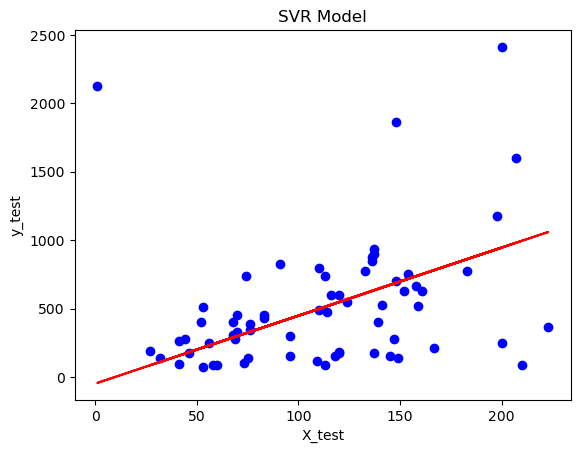

In [35]:
plt.scatter(X_test, y_test, color="blue")  

# Modelin tahmin ettiği değerleri çizdirin
plt.plot(X_test, y_pred, color="red")  

# Grafik başlıkları ve etiketleri
plt.xlabel('X_test') 
plt.ylabel('y_test')  
plt.title('SVR Model') 
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {1} + {1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y = 5.1724561354706875 + 5.1724561354706875 x


In [37]:
- 5.1724561354706875  + 5.1724561354706875  * 91

465.5210521923619

ValueError: x and y must have same first dimension, but have shapes (197, 1) and (66,)

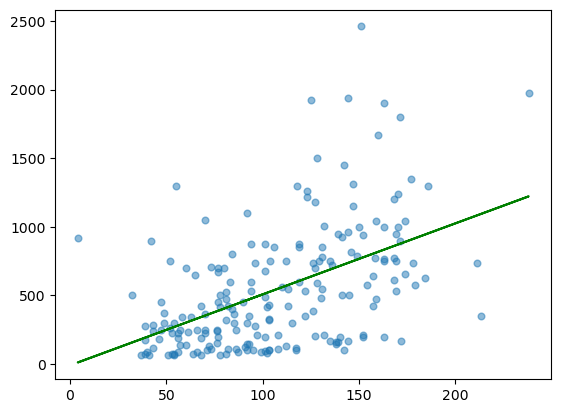

In [38]:


plt.scatter(X_train["Hits"], y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'green')
plt.plot(X_train, y_pred, color = 'r')

# Etiketler ve başlık ekleyin
plt.xlabel("Atis Sayisi (Hits)")
plt.ylabel("Maas (Salary)");

#### Tahmin

In [39]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [41]:
svr_model.predict([[91]])

array([403.52804878])

In [43]:
y_pred = svr_model.predict(X_test)

In [45]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Modeli eğitin
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
# Test verileri üzerinde tahmin yapın
y_pred = svr_model.predict(X_test)

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 459.0187960365147


In [49]:
svr_model

SVR(kernel='linear')

#### SVR-Model Tuning

In [52]:
# Modelinizi yeniden eğitin ve tahmin yapın
# C = ceza parametresi
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(SVR(kernel="linear"), svr_params, cv=10).fit(X_train, y_train)
best_C = svr_cv_model.best_params_['C']

In [53]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [54]:
svr_tuned = SVR(kernel="linear", C=best_C).fit(X_train, y_train)

In [55]:
y_pred = svr_tuned.predict(X_test)

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

458.198966781116


In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

### Dogrusal Olamayan SVR

In [64]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

# aykiri gozlem
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

- ##### Radial Basis Function (RBF): En yaygın kullanılan çekirdek fonksiyonlardan biridir. Özellikle veri noktalarının merkezi bir noktaya olan uzaklığına dayalı olarak çalışır. RBF, doğrusal olmayan ilişkileri yakalamada oldukça etkilidir.

In [67]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel ='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])


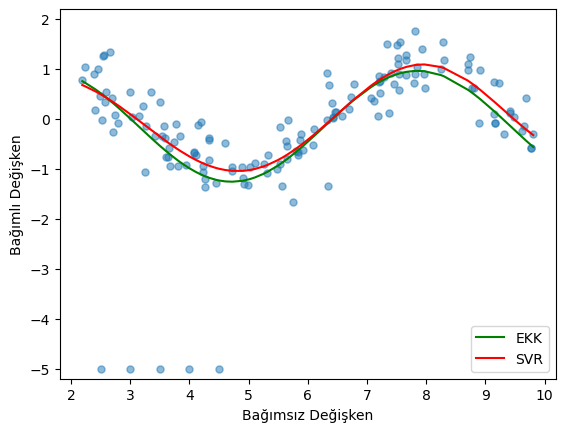

In [70]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, color="green")
plt_svr, = plt.plot(x_sim, svr_pred, color="red")

ax = plt.gca()  # Mevcut ekseni alın
ax.set_xlabel("Bağımsız Değişken")
ax.set_ylabel("Bağımlı Değişken")

plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc=4)


In [71]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [72]:
# rbf = Radial Basis Function
# svr modelin kurduk.
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

#### Dogrusal Olamayan-SVR Tahmin

In [77]:
y_pred = svr_rbf.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

#### Dogrusal Olamayan-SVR Model Tuning

In [81]:
svr_rbf

SVR()

In [83]:
svr_params = {"C" : [0.1, 0.4, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)
best_C = svr_cv_model.best_params_['C']

In [85]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [87]:
svr_tuned = SVR(kernel = "rbf", C = best_C).fit(X_train, y_train)

In [88]:
y_pred = svr_tuned.predict(X_test) # Tahmin islemi 
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

### Yapay Sinir Ağları
- İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

![Neuron Icon](https://f6publishing.blob.core.windows.net/7081838e-248b-4977-910c-623688b2b217/WJCC-8-3971-g001.png) <!-- İcon için ek bir görsel varsa buraya eklenebilir -->


 ##### Multilayer Perceptron (MLP)
* giriş katmanı (input layer), bir veya daha fazla gizli katman (hidden layers), ve çıkış katmanından (output layer) oluşur. Her katmandaki her nöron, önceki katmandaki tüm nöronlarla bağlantılıdır ve bu bağlantılar, sinir ağının öğrenme sürecinde ayarladığı ağırlıklarla birlikte gelir. MLP'ler, sınıflandırma ve regresyon problemleri de dahil olmak üzere birçok makine öğrenmesi görevinde yaygın olarak kullanılır.

#### ANN Model

In [95]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [100]:
X_train_scaled = scaler.transform(X_train)

In [103]:
X_test_scaled = scaler.transform(X_test)

In [106]:
from sklearn.neural_network import MLPRegressor

In [108]:
# 
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

In [109]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [112]:
# katman sayisi
mlp_model.n_layers_

4

In [113]:
# gizli katman icindeki eleman sayisini verdi 
mlp_model.hidden_layer_sizes

(100, 20)

#### Yapay sinir aglari (ANN) Tahmin

In [116]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 73.96049415, 327.2578743 , 188.55209214,  79.33803726,
        57.96735616])

In [117]:
y_pred = mlp_model.predict(X_test_scaled)

In [121]:
np.sqrt(mean_squared_error(y_test, y_pred))

493.40139233252154

#### ANN Model Tuning

In [123]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [125]:
mlp_params = {'alpha' : [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes' : [(20,20), (100,50,150), (300,200,150)],
              'activation' : ['relu', 'logistic']}

In [127]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [129]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [131]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [132]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [133]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [134]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [135]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.77739022461884

### Classification and Regression Trees (CART)
* Amac veri seti icersindeki karmasik yapilari basit karar yapilarina donusturmektir.
 Heterojen veri setleri belirlenmis bir hedef degiskene gore homojen alt gruplara ayrilir.

                                            Breiman 1984

In [137]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [138]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [139]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [140]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

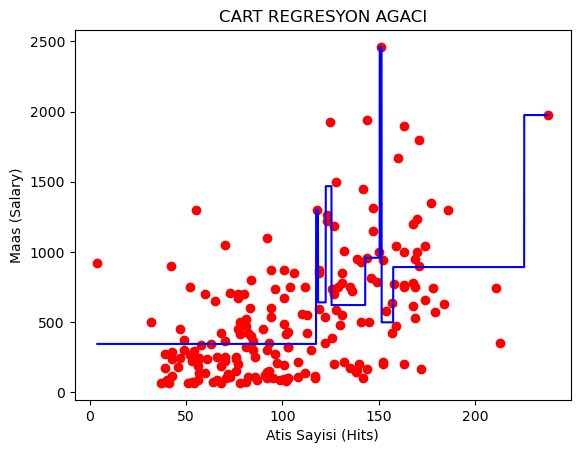

In [141]:
# grid izgara
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid)), 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Sayisi (Hits)")
plt.ylabel("Maas (Salary)");

In [142]:
pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [143]:
from skompiler import skompile

In [146]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


 -astor modülü, Python abstract syntax tree'lerini (AST) kaynak koda dönüştürmek için kullanılır. 

In [148]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

